# Class 5 Descriptive Statistics

## 1. Summary Statistics

pandas objects are equipped with a set of common mathematical and statistical methods.
Most of these fall into the category of **reductions** or **summary statistics**, methods
that extract **a single value (like the sum or mean)** from a Series or **a Series of values**
from the rows or columns of a DataFrame. Consider a
small DataFrame:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame([[1.4, 4.1], [7.1, -4.5],
                   [2.5, 3.2], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,4.1
b,7.10,-4.5
c,2.50,3.2
d,0.75,-1.3


Calling DataFrame’s sum method returns a Series containing **column sums**:

In [3]:
df.sum()

one    11.75
two     1.50
dtype: float64

Passing axis='columns' or axis=1 sums across the columns instead:

In [4]:
df.sum(axis='columns')

a    5.50
b    2.60
c    5.70
d   -0.55
dtype: float64

In [5]:
df.idxmax()

one    b
two    a
dtype: object

Other methods are accumulations:

In [6]:
df.cumsum()

,one,two
a,1.40,4.1
b,8.50,-0.4
c,11.00,2.8
d,11.75,1.5


Another type of method is neither a reduction nor an accumulation. describe is one
such example, producing multiple summary statistics in one shot:

In [7]:
df.describe()

,one,two
count,4.000000,4.000000
mean,2.937500,0.375000
std,2.867454,4.017773
min,0.750000,-4.500000
25%,1.237500,-2.100000
50%,1.950000,0.950000
75%,3.650000,3.425000
max,7.100000,4.100000


On non-numeric data, describe produces alternative summary statistics:

In [8]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

See table below for a full list of summary statistics and related methods. <br>
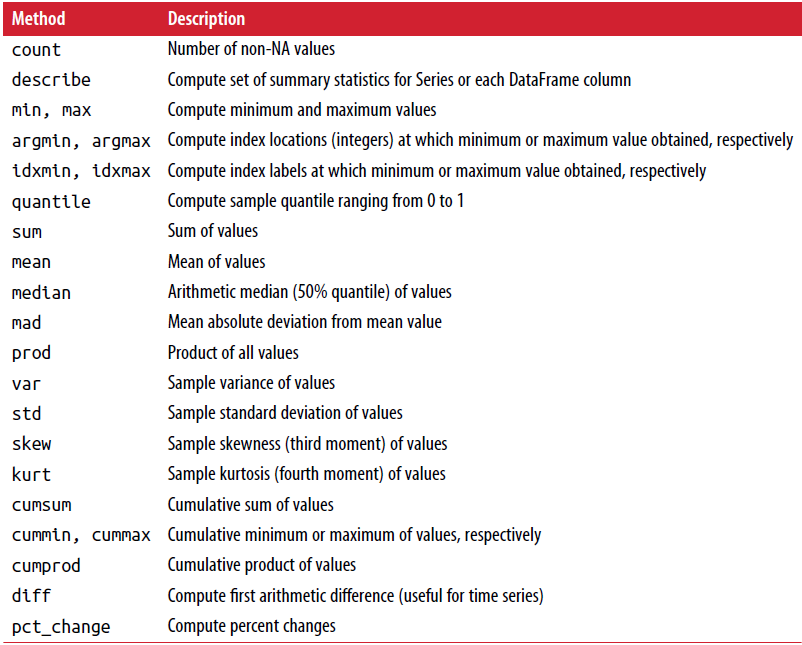

## 2. Correlation and Covariance

Some summary statistics, like correlation and covariance, are computed from **pairs of
arguments**. Let’s consider COVID data. 

In [9]:
data = pd.read_csv("covid-data.csv") # Make sure the data file is in the same folder as this notebook file

The **corr method of Series** computes the correlation of the overlapping, non-NA,
aligned-by-index values in two Series. Relatedly, cov computes the covariance:

In [10]:
data['new_cases'].corr(data['new_deaths'])

0.8792842487853555

In [11]:
data['new_cases'].cov(data['new_deaths'])

4164807.5583742927

You can also get a full correlation or
covariance matrix as a DataFrame:

In [12]:
data.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.946965,0.957017,0.975316,0.766002,0.794178,0.092237,0.048949,0.064105,0.095789,...,0.006848,-0.027669,-0.027849,0.016497,-0.011522,-0.011347,0.025728,-0.015844,0.004361,0.089035
new_cases,0.946965,1.000000,0.993541,0.960778,0.879284,0.891452,0.067651,0.065895,0.074847,0.073363,...,-0.002461,-0.026301,-0.028411,0.019356,-0.021613,-0.017706,0.031324,-0.024534,-0.000875,0.066944
new_cases_smoothed,0.957017,0.993541,1.000000,0.968543,0.869593,0.895762,0.069181,0.058895,0.076360,0.074528,...,-0.002371,-0.026060,-0.028775,0.019562,-0.021639,-0.018089,0.030698,-0.024747,-0.001170,0.068194
total_deaths,0.975316,0.960778,0.968543,1.000000,0.834291,0.865553,0.081902,0.042830,0.055768,0.131821,...,0.014802,-0.036740,-0.047532,0.009378,0.001985,-0.017034,0.030595,-0.015369,0.018351,0.144937
new_deaths,0.766002,0.879284,0.869593,0.834291,1.000000,0.971176,0.047781,0.049946,0.061414,0.078264,...,0.002596,-0.036723,-0.044243,0.015728,-0.013555,-0.021833,0.038222,-0.024557,0.009574,0.100536
new_deaths_smoothed,0.794178,0.891452,0.895762,0.865553,0.971176,1.000000,0.050173,0.047999,0.063383,0.083552,...,0.002860,-0.037298,-0.045910,0.016068,-0.013550,-0.022747,0.038283,-0.025319,0.009758,0.109589
total_cases_per_million,0.092237,0.067651,0.069181,0.081902,0.047781,0.050173,1.000000,0.471525,0.622321,0.571364,...,0.355468,-0.210157,-0.184531,0.113537,0.066771,-0.049526,0.249554,0.002561,0.243314,0.237426
new_cases_per_million,0.048949,0.065895,0.058895,0.042830,0.049946,0.047999,0.471525,1.000000,0.781821,0.217994,...,0.200799,-0.169122,-0.135868,0.116905,0.049209,-0.031712,0.223616,-0.011216,0.145564,0.174315
new_cases_smoothed_per_million,0.064105,0.074847,0.076360,0.055768,0.061414,0.063383,0.622321,0.781821,1.000000,0.287043,...,0.233292,-0.198197,-0.158725,0.137614,0.050411,-0.038963,0.263592,-0.014895,0.183371,0.199635
total_deaths_per_million,0.095789,0.073363,0.074528,0.131821,0.078264,0.083552,0.571364,0.217994,0.287043,1.000000,...,0.251582,-0.207008,-0.275025,-0.082512,0.281677,-0.100312,0.209621,0.042399,0.286392,0.289850


In [13]:
data.cov()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.039807e+12,1.249987e+10,1.262721e+10,3.711865e+10,2.870985e+08,2.941247e+08,3.723246e+08,3.689204e+06,3.780009e+06,1.395390e+07,...,1.523218e+08,-7.074537e+05,-3.530063e+06,7.269057e+04,-1.472616e+05,-1.868043e+05,1.233721e+06,-4.545797e+04,3.312488e+04,4605.756591
new_cases,1.249987e+10,1.668155e+08,1.656882e+08,4.641805e+08,4.164808e+06,4.172819e+06,3.451060e+06,6.276295e+04,5.577289e+04,1.350590e+05,...,-6.916338e+05,-8.490095e+03,-4.550529e+04,1.077739e+03,-3.489023e+03,-3.681801e+03,1.905921e+04,-8.893124e+02,-8.397104e+01,48.692047
new_cases_smoothed,1.262721e+10,1.656882e+08,1.614787e+08,4.677206e+08,4.117562e+06,4.060114e+06,3.518629e+06,5.571929e+04,5.514231e+04,1.368965e+05,...,-6.559370e+05,-8.242789e+03,-4.539213e+04,1.069015e+03,-3.434578e+03,-3.700339e+03,1.836758e+04,-8.847988e+02,-1.102452e+02,48.172788
total_deaths,3.711865e+10,4.641805e+08,4.677206e+08,1.392968e+09,1.144486e+07,1.173241e+07,1.210049e+07,1.181495e+05,1.203555e+05,7.028389e+05,...,1.204996e+07,-3.433018e+04,-2.204940e+05,1.512247e+03,9.281123e+02,-1.025788e+04,5.372503e+04,-1.613450e+03,5.101531e+03,259.060423
new_deaths,2.870985e+08,4.164808e+06,4.117562e+06,1.144486e+07,1.344915e+05,1.290769e+05,6.920843e+04,1.350770e+03,1.299381e+03,4.091063e+03,...,2.071432e+04,-3.358402e+02,-2.011843e+03,2.486355e+01,-6.209544e+01,-1.285084e+02,6.510261e+02,-2.526857e+01,2.609332e+01,2.080748
new_deaths_smoothed,2.941247e+08,4.172819e+06,4.060114e+06,1.173241e+07,1.290769e+05,1.272260e+05,7.162756e+04,1.274628e+03,1.284753e+03,4.307777e+03,...,2.220544e+04,-3.303918e+02,-2.032478e+03,2.464560e+01,-6.033234e+01,-1.304653e+02,6.362695e+02,-2.540154e+01,2.580949e+01,2.087941
total_cases_per_million,3.723246e+08,3.451060e+06,3.518629e+06,1.210049e+07,6.920843e+04,7.162756e+04,1.557798e+07,1.371484e+05,1.412460e+05,3.212098e+05,...,2.889899e+07,-1.238044e+04,-8.187596e+04,1.861540e+03,2.894160e+03,-2.712883e+03,1.797701e+04,2.588652e+01,7.119531e+03,138.352607
new_cases_per_million,3.689204e+06,6.276295e+04,5.571929e+04,1.181495e+05,1.350770e+03,1.274628e+03,1.371484e+05,5.430755e+03,3.300764e+03,2.288205e+03,...,2.629944e+05,-1.698315e+02,-9.414246e+02,3.187529e+01,3.181975e+01,-2.604991e+01,2.908543e+02,-1.650802e+00,7.941037e+01,1.545658
new_cases_smoothed_per_million,3.780009e+06,5.577289e+04,5.514231e+04,1.203555e+05,1.299381e+03,1.284753e+03,1.412460e+05,3.300764e+03,3.224726e+03,2.352856e+03,...,2.615562e+05,-1.644264e+02,-9.292856e+02,3.138495e+01,2.798568e+01,-2.739029e+01,2.841241e+02,-1.882775e+00,7.690583e+01,1.500807
total_deaths_per_million,1.395390e+07,1.350590e+05,1.368965e+05,7.028389e+05,4.091063e+03,4.307777e+03,3.212098e+05,2.288205e+03,2.352856e+03,2.028807e+04,...,7.395372e+05,-5.448876e+02,-4.016386e+03,-4.933977e+01,4.033238e+02,-1.788235e+02,4.227039e+02,1.581432e+01,3.005731e+02,5.604491


Using **DataFrame’s corrwith method**, you can compute pairwise correlations
between a DataFrame’s columns or rows with another Series or DataFrame. Passing a
Series returns a Series with the correlation value computed for each column:

In [14]:
data.corrwith(data.new_deaths)

total_cases                        0.766002
new_cases                          0.879284
new_cases_smoothed                 0.869593
total_deaths                       0.834291
new_deaths                         1.000000
new_deaths_smoothed                0.971176
total_cases_per_million            0.047781
new_cases_per_million              0.049946
new_cases_smoothed_per_million     0.061414
total_deaths_per_million           0.078264
new_deaths_per_million             0.124897
new_deaths_smoothed_per_million    0.124387
new_tests                          0.610419
total_tests                        0.485051
total_tests_per_thousand          -0.000237
new_tests_per_thousand             0.029181
new_tests_smoothed                 0.570033
new_tests_smoothed_per_thousand    0.017439
tests_per_case                    -0.040316
positive_rate                      0.225269
stringency_index                   0.117093
population                         0.756338
population_density              

## 3. Unique Values, Value Counts, and Membership<br>
Another class of related methods extracts information about the values contained in a
one-dimensional Series. To illustrate these, consider this example:

In [15]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

The first function is unique, which gives you an array of the unique values in a Series:

In [16]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

The unique values are not necessarily returned in sorted order, but could be sorted if needed (uniques.sort()). Relatedly, value_counts computes a Series
containing value frequencies:

In [17]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

The Series is sorted by value in **descending order** as a convenience. value_counts is
also available as a top-level pandas method that can be used with any array or
sequence:

In [18]:
pd.value_counts(obj.values, sort=False)

d    1
b    2
a    3
c    3
dtype: int64

isin performs a membership check and can be useful in filtering a
dataset down to a subset of values in a Series or column in a DataFrame:

In [19]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [20]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [21]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object